In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/0802_gold_stats_for_er.csv')

In [4]:
data.head()

,DBNOs,assists,boosts,damageDealt,deathType,duration,gameMode,headshotKills,heals,killPlace,killStreaks,kills,longestKill,mapName,matchType,match_id,name,playerId,revives,rideDistance,roadKills,swimDistance,teamKills,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace
0,0,0,0,188.00002,logout,1807,solo,0,0,5,0,0,0.0,Range_Main,training,f1d3a664-7285-4ece-9102-d42465d9ee5e,s3591,account.586f1c5f5d6a4cf28b5060cfcddfab20,0,0.0,0,0.0,0,861.580,0,0.0,4,18
1,0,0,0,0.00000,logout,1807,solo,0,0,10,0,0,0.0,Range_Main,training,f1d3a664-7285-4ece-9102-d42465d9ee5e,ljls0840,account.f4fa5d4e43dc40d19b51aa994f9357da,0,0.0,0,0.0,0,249.591,0,0.0,0,18
2,0,0,0,0.00000,logout,1807,solo,0,0,19,0,0,0.0,Range_Main,training,f1d3a664-7285-4ece-9102-d42465d9ee5e,amg8282,account.463062f5bce345769886f2690c9e35b9,0,0.0,0,0.0,0,98.870,0,0.0,1,18
3,0,0,0,396.00000,logout,1807,solo,0,0,15,0,0,0.0,Range_Main,training,f1d3a664-7285-4ece-9102-d42465d9ee5e,dbdbdb0,account.136f4a31e597480f9b6802ebd34cd7e6,0,0.0,0,0.0,0,163.421,0,0.0,2,18
4,0,0,0,0.00000,logout,1807,solo,0,0,12,0,0,0.0,Range_Main,training,f1d3a664-7285-4ece-9102-d42465d9ee5e,wnrdjfk44,account.354c30655f494f68a3097c263c5b6ba9,0,0.0,0,0.0,0,239.838,0,0.0,1,18


# Feature Engineering

In [5]:
# matchType official 뽑아오기

data = data[data['matchType'] == 'official']

In [ ]:
data.columns

Index(['DBNOs', 'assists', 'boosts', 'damageDealt', 'deathType', 'duration',
       'gameMode', 'headshotKills', 'heals', 'killPlace', 'killStreaks',
       'kills', 'longestKill', 'mapName', 'matchType', 'match_id', 'name',
       'playerId', 'revives', 'rideDistance', 'roadKills', 'swimDistance',
       'teamKills', 'timeSurvived', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPlace'],
      dtype='object')

58     1236
61     1229
59     1229
52     1229
62     1227
       ... 
84     1119
97     1104
98      957
99      705
100     349
Name: winPlace, Length: 100, dtype: int64

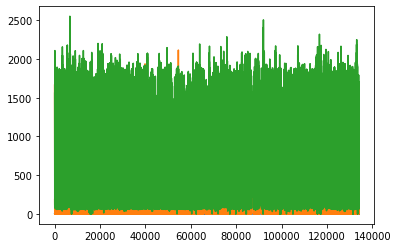

In [6]:
# DBNOs
data['DBNOs'].value_counts() #0값이 너무 많다

# assists
data['assists'].value_counts() # 다 0이다 -> 솔랭이라?

# boosts
data['boosts'].value_counts() # 0값이 많긴 하지만 (나름) 잘 나눠져있음
data['boosts'].plot()

# damageDealt
data['damageDealt'].value_counts() # 0 값 많지만 괜찮다...가 아니라 그래보임.
data['damageDealt'].plot()

# deathType
data['deathType'].value_counts() # byplayer, logout, byzone, suicide, alive 

# duration
data['duration'].value_counts() # 이게뭐지 ;ㅅ;

# gameMode
data['gameMode'].value_counts() # solo만 있다

# headshotKills
data['headshotKills'].value_counts() # 0이 많고 11까지 분포

# heals
data['heals'].value_counts() 

# killPlace
data['killPlace'].value_counts()

# killStreaks = 연속킬수
data['killStreaks'].value_counts() # 0이 8만건..

# revives = 소생횟수
data['revives'].value_counts() # 0이 너무 많다 1:667개, 2: 10개

# kills
data['kills'].value_counts() # 0 8만개, 점점 줄어든다.

# longestKill
data['longestKill'].value_counts() # 0이 너무많다. 9만개

# mapName
data['mapName'].value_counts() # 걍적당

# roadKills
data['roadKills'].value_counts() # 어우 13만건 0

# teamKills
data['teamKills'].value_counts() #전부 다 0

# timeSurvived
data['timeSurvived'].value_counts() # 80~
data['timeSurvived'].plot()

# vehicleDistroys
data['vehicleDestroys'].value_counts() # 0이 13만건

# weaponsAccquired
data['weaponsAcquired'].value_counts() # 0이 3만값

# winPlace
data['winPlace'].value_counts() # 17, 18, 19가 굉장히 많다. training 탓인듯. 제거해보기


In [7]:
# DROP

data.drop(columns = ['assists', 'gameMode', 'mapName', 'roadKills', 'teamKills', 'vehicleDestroys'], inplace = True)

In [8]:
# playerId, match_id, name DROP

data.drop(columns = ['playerId', 'match_id', 'name'], inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116070 entries, 36 to 134119
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   DBNOs            116070 non-null  int64  
 1   boosts           116070 non-null  int64  
 2   damageDealt      116070 non-null  float64
 3   deathType        116070 non-null  object 
 4   duration         116070 non-null  int64  
 5   headshotKills    116070 non-null  int64  
 6   heals            116070 non-null  int64  
 7   killPlace        116070 non-null  int64  
 8   killStreaks      116070 non-null  int64  
 9   kills            116070 non-null  int64  
 10  longestKill      116070 non-null  float64
 11  matchType        116070 non-null  object 
 12  revives          116070 non-null  int64  
 13  rideDistance     116070 non-null  float64
 14  swimDistance     116070 non-null  float64
 15  timeSurvived     116070 non-null  float64
 16  walkDistance     116070 non-null  flo

In [9]:
data.drop(columns = 'matchType', inplace = True) #matchType 다 솔랭이라 드랍

In [11]:
data['deathType'].value_counts()

byplayer    107161
byzone        5437
suicide       2266
alive         1195
logout          11
Name: deathType, dtype: int64

In [10]:
# object 변수 LabelEncoding 해야할까 근데 생각보다 할 게 별로 없다.

# data[data['deathType'] == 'suicide']['damageDealt'].mean() -> 가한뎀지가 76 의미 X

data = data[data['deathType'] != 'suicide'] # 그래서 자살한 애들 드랍시키고 데스타입 삭제 ~.~

In [11]:
data.drop(columns = 'deathType', inplace = True)

In [14]:
data.head()

,DBNOs,boosts,damageDealt,duration,headshotKills,heals,killPlace,killStreaks,kills,longestKill,revives,rideDistance,swimDistance,timeSurvived,walkDistance,weaponsAcquired,winPlace
36,0,4,184.30798,2108,0,10,14,1,1,3.067776,0,0.009023,14.501883,1557.0,4332.38770,6,5
37,0,1,0.00000,2108,0,0,57,0,0,0.000000,0,0.000000,0.000000,1161.0,913.12830,0,41
38,0,9,1671.55620,2108,4,5,1,2,20,168.747600,0,2770.400400,7.452103,1673.0,2688.17190,6,3
40,0,0,0.00000,2108,0,0,92,0,0,0.000000,0,0.000000,0.000000,536.0,49.61081,0,91
41,0,2,64.50000,2108,0,0,61,0,0,0.000000,0,0.000000,587.948670,1115.0,1561.63270,0,45


In [12]:
# DBNOs + kills = KA

data['KA'] = data['DBNOs'] + data['kills']

In [16]:
data['KA'].value_counts() # cat_cols로 범위 잡았음 좋겠는디..

0     62935
1     26480
2     11439
3      5520
4      3014
5      1711
6      1076
7       587
8       402
9       248
10      139
11       92
12       55
13       36
14       28
15       20
16        8
17        6
18        4
21        1
19        1
20        1
23        1
Name: KA, dtype: int64

In [17]:
data['KA'].describe() # 어 그러니까.. 50%가 0이고 75%가 1 wtf

count    113804.000000
mean          0.941522
std           1.571865
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          23.000000
Name: KA, dtype: float64

In [ ]:
data.corr() # regression 할건지? multicollinearity 찍어보기 . 0.9 넘는 값 없는걸루 (만든 피쳐 빼고요)

,DBNOs,boosts,damageDealt,duration,headshotKills,heals,killPlace,killStreaks,kills,longestKill,revives,rideDistance,swimDistance,timeSurvived,walkDistance,weaponsAcquired,winPlace,KA
DBNOs,1.000000,0.217262,0.219593,0.053550,0.142285,0.083115,-0.142647,0.114020,0.191029,0.169689,0.247937,0.167821,-0.000622,0.152574,0.116104,0.107427,-0.133129,0.273615
boosts,0.217262,1.000000,0.621294,0.078857,0.430421,0.439046,-0.619399,0.447437,0.590317,0.508356,0.116471,0.513630,0.037192,0.708533,0.662059,0.459165,-0.710058,0.597220
damageDealt,0.219593,0.621294,1.000000,0.008084,0.636157,0.325834,-0.714435,0.678846,0.935190,0.631859,0.068618,0.295484,-0.007817,0.484340,0.436936,0.358836,-0.522611,0.935358
duration,0.053550,0.078857,0.008084,1.000000,-0.009850,0.037579,0.016421,-0.009551,-0.009420,0.030080,0.034118,0.188016,0.063155,0.256459,0.092172,-0.112806,0.040273,-0.004602
headshotKills,0.142285,0.430421,0.636157,-0.009850,1.000000,0.209531,-0.468994,0.449973,0.664065,0.515754,0.048309,0.225287,-0.011092,0.305040,0.297784,0.282661,-0.343208,0.663004
heals,0.083115,0.439046,0.325834,0.037579,0.209531,1.000000,-0.367459,0.267299,0.307651,0.229451,0.073085,0.223432,0.063928,0.410593,0.414611,0.215910,-0.412396,0.308645
killPlace,-0.142647,-0.619399,-0.714435,0.016421,-0.468994,-0.367459,1.000000,-0.842171,-0.733181,-0.529325,-0.061795,-0.330872,-0.050203,-0.687313,-0.606914,-0.412794,0.801948,-0.730761
killStreaks,0.114020,0.447437,0.678846,-0.009551,0.449973,0.267299,-0.842171,1.000000,0.723823,0.493826,0.045105,0.210721,0.007605,0.399110,0.369987,0.298599,-0.467823,0.719118
kills,0.191029,0.590317,0.935190,-0.009420,0.664065,0.307651,-0.733181,0.723823,1.000000,0.641837,0.057101,0.267147,-0.001681,0.460974,0.423564,0.337682,-0.503112,0.996395
longestKill,0.169689,0.508356,0.631859,0.030080,0.515754,0.229451,-0.529325,0.493826,0.641837,1.000000,0.063418,0.323304,-0.016292,0.380840,0.379737,0.356499,-0.417879,0.643592


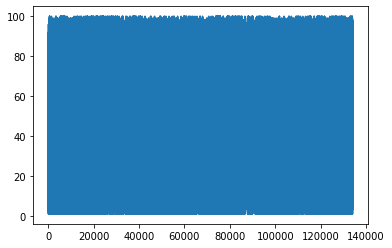

In [ ]:
data['winPlace'].plot()

In [ ]:
data['winPlace'].value_counts()

58     1212
1      1207
6      1202
9      1201
4      1201
       ... 
87     1103
97     1073
98      901
99      643
100     317
Name: winPlace, Length: 100, dtype: int64

In [18]:
data['winPlace'].mean() # 100등까지 있는데 49.3정도가 평균이면 거의 대부분 잘 있는거 아닌가?

49.31034058556817

In [19]:
data.groupby('winPlace').mean() 

# swimDistance 이상해
# revives는 솔랭이라 원샷원킬당하는 애들때문에 0값 너무 많아서 무의미하다고 판단 (1이랑 2만 1600개정도)


,DBNOs,boosts,damageDealt,duration,headshotKills,heals,killPlace,killStreaks,kills,longestKill,revives,rideDistance,swimDistance,timeSurvived,walkDistance,weaponsAcquired,KA
winPlace,,,,,,,,,,,,,,,,,
1,0.178956,9.370340,679.795554,1709.797017,1.575808,3.342171,3.217896,1.252693,6.286661,130.039737,0.024855,3055.496488,9.586044,1660.696541,2297.472914,6.054681,6.465617
2,0.103247,8.572023,491.679425,1709.104913,1.014988,3.538718,7.426311,1.093256,4.250624,105.258874,0.019983,2789.072694,12.105453,1657.684430,2284.719158,5.952540,4.353872
3,0.083612,7.931438,431.186916,1710.088629,0.952341,3.285953,10.335284,1.047659,3.718227,100.680252,0.026756,2707.378620,22.651404,1607.637960,2252.082128,5.758361,3.801839
4,0.067444,7.208993,364.727556,1709.045795,0.752706,3.060783,13.427144,0.957535,3.036636,85.362843,0.024979,2586.227866,20.564373,1565.061615,2224.178326,5.558701,3.104080
5,0.068619,6.856067,330.228730,1709.438494,0.717992,3.033473,14.801674,0.939749,2.793305,81.251269,0.018410,2477.113706,30.656294,1530.656904,2205.227409,5.338075,2.861925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.000000,0.000901,13.655530,1730.682883,0.003604,0.000901,97.730631,0.032432,0.032432,0.267670,0.000000,2.437355,0.304363,207.785586,23.063435,0.645045,0.032432
97,0.000000,0.001864,15.122947,1734.113700,0.007456,0.000000,98.537745,0.032619,0.032619,0.285824,0.000000,2.056752,0.140947,213.082945,18.346072,0.574091,0.032619
98,0.000000,0.000000,12.644206,1739.241953,0.001110,0.001110,99.811321,0.019978,0.019978,0.076449,0.000000,1.149839,0.018105,218.855716,15.954852,0.510544,0.019978


In [13]:
# swimDistance랑 revives DROP

data.drop(columns = ['swimDistance', 'revives'], inplace = True)

In [ ]:
# 엥 winPlace로 해도 의미있을것같다.

In [ ]:
plt.rcParams['axes.unicode_minus'] = False # 마이너스표기 무시

plt.figure(figsize = (10, 10))
sns.heatmap(data=data, annot = True, fmt = '.2f', cmap = 'Blues')
plt.show() # 상관계수 좀 찍어볼라그랬는데 몇시간이나 걸리는건지 알수가 없다 ;

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fa4f649f560> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fa4f64a7050> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
def devidefunc(x):
  if x == 0:
    return 0
  elif x == 1:
    return 1
  elif x == 2:
    return 2
  elif 3 <= x <= 5:
    return 3
  elif 6 <= x <= 10:
    return 4
  elif 10 < x < 25:
    return 5
  else:
    print(x)

In [ ]:
data.columns

Index(['DBNOs', 'boosts', 'damageDealt', 'duration', 'headshotKills', 'heals',
       'killPlace', 'killStreaks', 'kills', 'longestKill', 'rideDistance',
       'timeSurvived', 'walkDistance', 'weaponsAcquired', 'winPlace', 'KA'],
      dtype='object')

In [14]:
data = pd.DataFrame(data, columns = ['DBNOs', 'boosts', 'damageDealt', 'duration', 'headshotKills', 'heals',
       'killPlace', 'killStreaks', 'kills', 'longestKill', 'rideDistance',
       'timeSurvived', 'walkDistance', 'weaponsAcquired', 'KA', 'winPlace'])

In [ ]:
data.head()

,DBNOs,boosts,damageDealt,duration,headshotKills,heals,killPlace,killStreaks,kills,longestKill,rideDistance,timeSurvived,walkDistance,weaponsAcquired,KA,winPlace
36,0,4,184.30798,2108,0,10,14,1,1,3.067776,0.009023,1557.0,4332.38770,6,1,5
37,0,1,0.00000,2108,0,0,57,0,0,0.000000,0.000000,1161.0,913.12830,0,0,41
38,0,9,1671.55620,2108,4,5,1,2,20,168.747600,2770.400400,1673.0,2688.17190,6,20,3
40,0,0,0.00000,2108,0,0,92,0,0,0.000000,0.000000,536.0,49.61081,0,0,91
41,0,2,64.50000,2108,0,0,61,0,0,0.000000,0.000000,1115.0,1561.63270,0,0,45


## train_test_split 

In [15]:
train = data.iloc[:, :-1]
test = pd.DataFrame(data.iloc[:, -1])

In [23]:
train.head()

,DBNOs,boosts,damageDealt,duration,headshotKills,heals,killPlace,killStreaks,kills,longestKill,rideDistance,timeSurvived,walkDistance,weaponsAcquired,KA
36,0,4,184.30798,2108,0,10,14,1,1,3.067776,0.009023,1557.0,4332.38770,6,1
37,0,1,0.00000,2108,0,0,57,0,0,0.000000,0.000000,1161.0,913.12830,0,0
38,0,9,1671.55620,2108,4,5,1,2,20,168.747600,2770.400400,1673.0,2688.17190,6,20
40,0,0,0.00000,2108,0,0,92,0,0,0.000000,0.000000,536.0,49.61081,0,0
41,0,2,64.50000,2108,0,0,61,0,0,0.000000,0.000000,1115.0,1561.63270,0,0


In [ ]:
test.value_counts()

winPlace
58          1212
1           1207
6           1202
2           1201
4           1201
            ... 
87          1103
97          1073
98           901
99           643
100          317
Length: 100, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train,
                                                   test,
                                                   test_size= 0.2,
                                                   stratify=test,
                                                   random_state = 1234)

### KFold

In [17]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits =5, random_state = 1234, shuffle = True)

### lightGBM // test Categorize 안하고 돌린 버전

In [18]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
LGB_clf = LGBMClassifier(random_state = 1234, n_jobs = -1)

parameters={
    "n_estimators" : [ 100,200, 500,1000],
    "learning_rate":[0.1,0.2,0.3,0.4,0.5], # 해당하는 파라미터 조합이 아니면 패스한다. 무시해버린 느낌.
    "colsample_bytree" : [0.2, 0.25, 0.3, 0.5,  0.7]
}

n_iter_search = 10
# 세팅!!!아직 학습은 아님!!!!!!
lgbm_rgs = RandomizedSearchCV(LGB_clf,
                            param_distributions=parameters,
                             cv = kfold,
                             scoring="accuracy",
                             n_jobs=-1,
                             random_state=1234,
                             n_iter=n_iter_search,
                             verbose = 2
                            )
lgbm_rgs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
lgbm_rgs.best_score_

In [ ]:
# accuracy #
lgbm_rgs_best = lgbm_rgs.best_estimator_
lgbm_rgs_pred = lgbm_rgs_best.predict(np.ascontiguousarray(X_test))
lgbm_rgs_accuracy = accuracy_score(y_test, lgbm_rgs_pred)
print("LightGBM에서 best모델로 X_test한 정확도 : {}".format(lgbm_rgs_accuracy))

### pycaret

In [17]:
!pip install pycaret

     |████████████████████████████████| 264 kB 7.8 MB/s 
     |████████████████████████████████| 1.3 MB 13.7 MB/s 
     |████████████████████████████████| 56 kB 5.6 MB/s 
     |████████████████████████████████| 105 kB 15.6 MB/s 
     |████████████████████████████████| 14.4 MB 62 kB/s 
     |████████████████████████████████| 80 kB 12.7 MB/s 
     |████████████████████████████████| 248 kB 69.2 MB/s 
     |████████████████████████████████| 167 kB 76.5 MB/s 
     |████████████████████████████████| 2.0 MB 52.9 MB/s 
     |████████████████████████████████| 1.7 MB 57.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 271 kB 63.2 MB/s 
     |████████████████████████████████| 6.8 MB 57.9 MB/s 
     |████████████████████████████████| 102 kB 73.6 MB/s 
     |████████████████████████████████| 62 kB 966 kB/s 
     |████████████████████

In [27]:
from pycaret.classification import *

In [28]:
exp1 = setup(data, target = 'winPlace')

,Description,Value
0,session_id,7895
1,Target,winPlace
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(113804, 16)"
5,Missing Values,False
6,Numeric Features,15
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
from sklearn.metrics import log_loss

add_metric('logloss', 'LogLoss', log_loss,greater_is_better=False,target='pred_proba')

Name                                                           LogLoss
Display Name                                                   LogLoss
Score Function                   <function log_loss at 0x7fe32a549320>
Scorer               make_scorer(log_loss, greater_is_better=False,...
Target                                                      pred_proba
Args                                                                {}
Greater is Better                                                False
Multiclass                                                        True
Custom                                                            True
Name: logloss, dtype: object

In [ ]:
best = compare_models(fold=5, sort='logloss', n_select=2, exclude=['svm','ridge'])

NameError: ignored

In [1]:
best2 = compare_models(fold = 5, sort = 'Accuracy', n_select = 2)

NameError: ignored

In [ ]:
def winPlace(x):
  if x <= 10 :
    return 1
  elif 10 < x <= 20:
    return 2
  elif 20 < x <= 30:
    return 3
  elif 30 < x <= 40:
    return 4
  elif 40 < x <= 50:
    return 5
  elif 50 < x <= 60:
    return 6
  elif 60 < x <= 70:
    return 7
  elif 70 < x <= 80:
    return 8
  elif 80 < x <= 90:
    return 9
  elif 90 < x :
    return 10
  else:
    return 11

In [ ]:
data['winPlace2'].apply(lambda x: winPlace(x))

In [ ]:
# pycaret 2

exp2 = setup(data, target = 'winPlace2')

In [ ]:
best3 = compare_models(fold = 5, sort = 'Accuracy', n_select = 2)

In [ ]:
top3 = compare_models(n_select = 3)